# Solutions (3.13)

First, to run the simulation we can use the same approach as last week.

Text(0, 0.5, 'Concentrations')

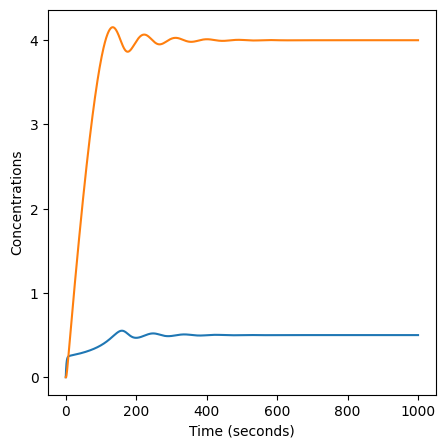

In [7]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# set up variables and arrays
n = 1001
k1 = 0.1
k2 = 0.4
k3 = 0.1
k4 = 0.2

X = np.zeros(n)
Y = np.zeros(n)

# initialise variables (not strictly necessary here!)
X[0] = 0
Y[0] = 0

# implement equations
for i in range(n - 1):
    X[i+1] = X[i] + k1 - k2*X[i] + k3*(X[i]**2)*Y[i]
    Y[i+1] = Y[i] + k4*X[i] - k3*(X[i]**2)*Y[i]

# plot on the same figure
plt.figure(figsize=(5,5))
plt.plot(X)
plt.plot(Y)
plt.xlabel("Time (seconds)")
plt.ylabel("Concentrations")

## Determine the steady state

We are told that the system is in equilibrium after $1000$ steps (and we can see from the figure that oscillations are not visible after about 600 steps), so to determine the steady state value of $X$ we just need to check the value of $X_{1000}$.

In [10]:
print('The steady state value of X is', X[1000])

The steady state value of X is 0.49999157908818176


## Turning into a function

As we saw in the tutorial, we just need to wrap our existing code in a few extra lines to turn it into a function that can handle lots of values of $k_4$. 

In [13]:
def steady_state_X(k1, k2, k3, k4):
    # set up variables and arrays
    n = 1001

    X = np.zeros(n)
    Y = np.zeros(n)

    # initialise variables (not strictly necessary here!)
    X[0] = 0
    Y[0] = 0

    # implement equations
    for i in range(n - 1):
        X[i+1] = X[i] + k1 - k2*X[i] + k3*(X[i]**2)*Y[i]
        Y[i+1] = Y[i] + k4*X[i] - k3*(X[i]**2)*Y[i]
        
    #return the steady state
    return(X[1000])

To test this we can check it returns the same value as above for $k_1=0.1$, $k_2=0.4$, $k_3=0.1$ and $k_4=0.2$.

In [14]:
print("The steady state value of X is", steady_state_X(0.1, 0.4, 0.1, 0.2))

The steady state value of X is 0.49999157908818176


As we expected!

## Explore behaviour for changing $k_4$

We would like to explore how the steady state value of $X$ changes for values of $k_4$ between $0$ and $0.3$. We did something similar in the tutorial, so we can modify our existing code:


Text(0, 0.5, 'Steady state value')

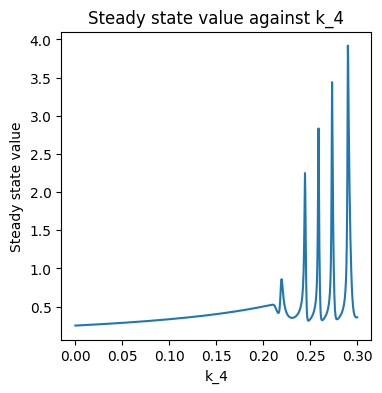

In [16]:
# set up variables and arrays
k4_array = np.linspace(0, 0.3, 1000)
steady_state = np.zeros(1000) # be careful not to give this the same name as the function!

for i in range(1000):
    # Calculate the steady state value of X
    # for the given value of k_4
    steady_state[i] = steady_state_X(0.1, 0.4, 0.1, k4_array[i])

# Create a plot of steady state values against k_4 values
plt.figure(figsize=(4,4))
plt.plot(k4_array, steady_state)
plt.title('Steady state value against k_4')
plt.xlabel('k_4')
plt.ylabel('Steady state value')

We can see that as $k_4$ increases from $0$ to $0.2$, the steady state value also gradually increases. When $k_4$ is larger than $0.2$ the steady state value appears to oscillates rapidly. This is because for values of $k_4$ above about $0.2$, the system doesn't reach a steady state.

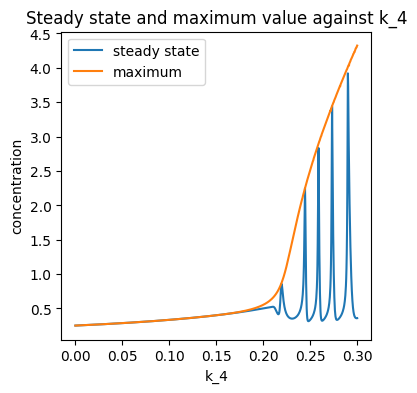

In [27]:
def max_X(k1, k2, k3, k4):
    # set up variables and arrays
    n = 1001

    X = np.zeros(n)
    Y = np.zeros(n)

    # initialise variables (not strictly necessary here!)
    X[0] = 0
    Y[0] = 0

    # implement equations
    for i in range(n - 1):
        X[i+1] = X[i] + k1 - k2*X[i] + k3*(X[i]**2)*Y[i]
        Y[i+1] = Y[i] + k4*X[i] - k3*(X[i]**2)*Y[i]
        
    #return the steady state
    return(np.max(X))

# set up variables and arrays
k4_array = np.linspace(0, 0.3, 1000)
steady_state = np.zeros(1000) 
max_X_array = np.zeros(1000)

for i in range(1000):
    # Calculate the steady state value of X
    # for the given value of k_4
    steady_state[i] = steady_state_X(0.1, 0.4, 0.1, k4_array[i])
    max_X_array[i] = max_X(0.1, 0.4, 0.1, k4_array[i])

# Create a plot of steady state and max values against k_4 values
plt.figure(figsize=(4,4))
plt.plot(k4_array, steady_state, label="steady state")
plt.plot(k4_array, max_X_array, label="maximum")
plt.title('Steady state and maximum value against k_4')
plt.xlabel('k_4')
plt.ylabel('concentration')
plt.legend()

